## Testing Image Classification Using CNN model

In [1]:
# Importing Packages

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Setting path for Train and Test data

train_dir = 'Personal_Project/TrainCNN/'
test_dir = 'Personal_Project/TestCNN/'

In [3]:
# Data augmentation and normalization for training

train_data_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
# Only rescaling for test

test_data_generator = ImageDataGenerator(rescale=1./255)

In [5]:
# Create Generators for Train data

train_generator = train_data_generator.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 200 images belonging to 2 classes.


In [6]:
# Create Generators for Test data

test_generator = test_data_generator.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 100 images belonging to 2 classes.


In [7]:
# Building the CNN model

CNN_model = Sequential()

# First convolutional layer
CNN_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
CNN_model.add(Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
CNN_model.add(Flatten())

# Fully connected layer
CNN_model.add(Dense(512, activation='relu'))
CNN_model.add(Dropout(0.5))

# Output layer with sigmoid activation
CNN_model.add(Dense(1, activation='sigmoid'))

C:\PythonProgramming\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compiling the model

CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Model Training

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

train_history = CNN_model.fit(train_generator, steps_per_epoch = 2000 // 32, epochs=25, validation_data = test_generator, validation_steps = 800 // 32, callbacks=[early_stopping])

Epoch 1/25


C:\PythonProgramming\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 7/62 ━━━━━━━━━━━━━━━━━━━━ 31s 578ms/step - accuracy: 0.4189 - loss: 1.1393

C:\PythonProgramming\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.3977 - loss: 0.9965 - val_accuracy: 0.5000 - val_loss: 0.6966
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5518 - loss: 0.6909 - val_accuracy: 0.5000 - val_loss: 0.6979
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5514 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 0.7010
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5471 - loss: 0.6880 - val_accuracy: 0.5000 - val_loss: 0.7039
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5505 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 6/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5529 - loss: 0.6838 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 7/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5544 - loss: 0.6808 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5806 - loss: 0.6758 - val_accuracy: 0.5400 - val_loss: 0.

In [10]:
# Model Evaluation

val_loss, val_acc = CNN_model.evaluate(test_generator, steps=800 // 32)
print(f'Test loss: {val_loss}')
print(f'Test accuracy: {val_acc}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5961 - loss: 0.6545 
Test loss: 0.649848997592926
Test accuracy: 0.6000000238418579


In [11]:
# Importing packages for evaluation of the CNN model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import seaborn as sns

In [12]:
# Generate predictions

test_generator.reset()
predictions = CNN_model.predict(test_generator, steps = test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


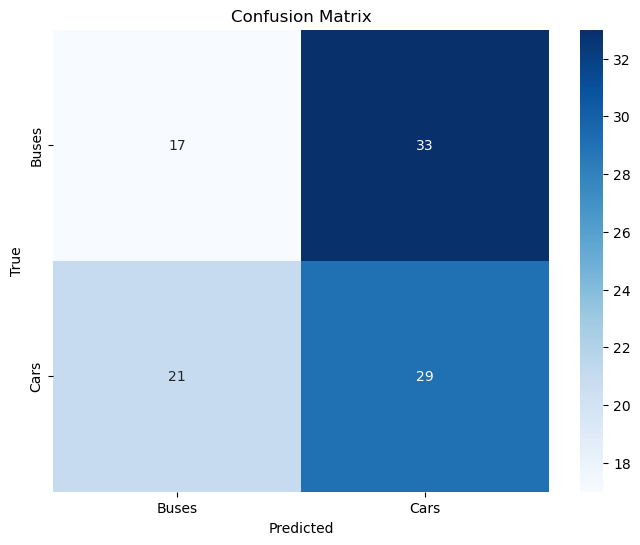

In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       Buses       0.45      0.34      0.39        50
        Cars       0.47      0.58      0.52        50

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.46      0.46      0.45       100



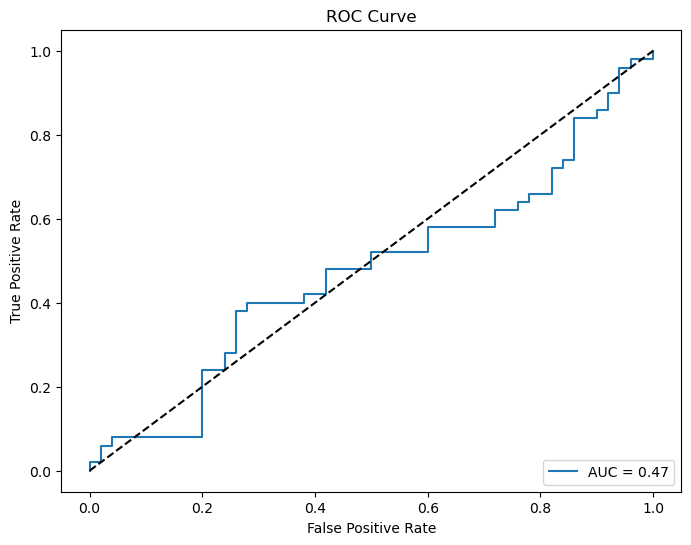

In [15]:
# ROC-AUC Curve
roc_auc = roc_auc_score(true_classes, predictions)
fpr, tpr, thresholds = roc_curve(true_classes, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

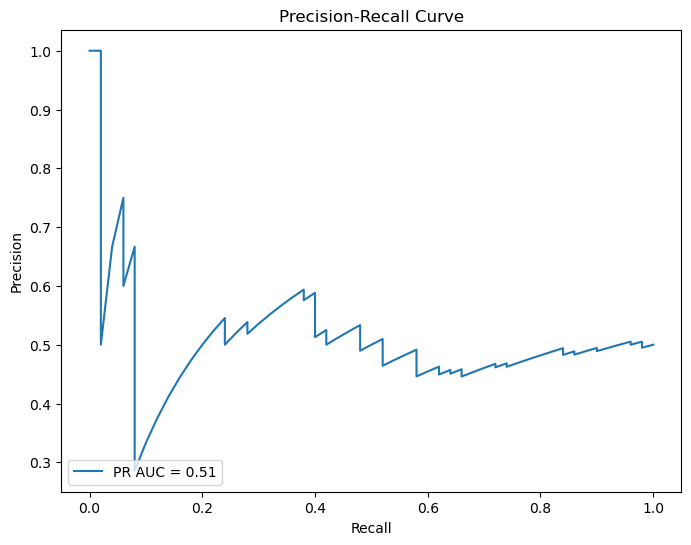

In [16]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_classes, predictions)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [17]:
# Sensitivity (Recall)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f'Sensitivity (Recall): {sensitivity:.2f}')

Sensitivity (Recall): 0.58


In [18]:
# Specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Specificity: {specificity:.2f}')

Specificity: 0.34


In [19]:
# Importing Required Packages

import matplotlib.pyplot as plt

In [20]:
# Extract accuracy and loss history

acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs = range(len(acc))

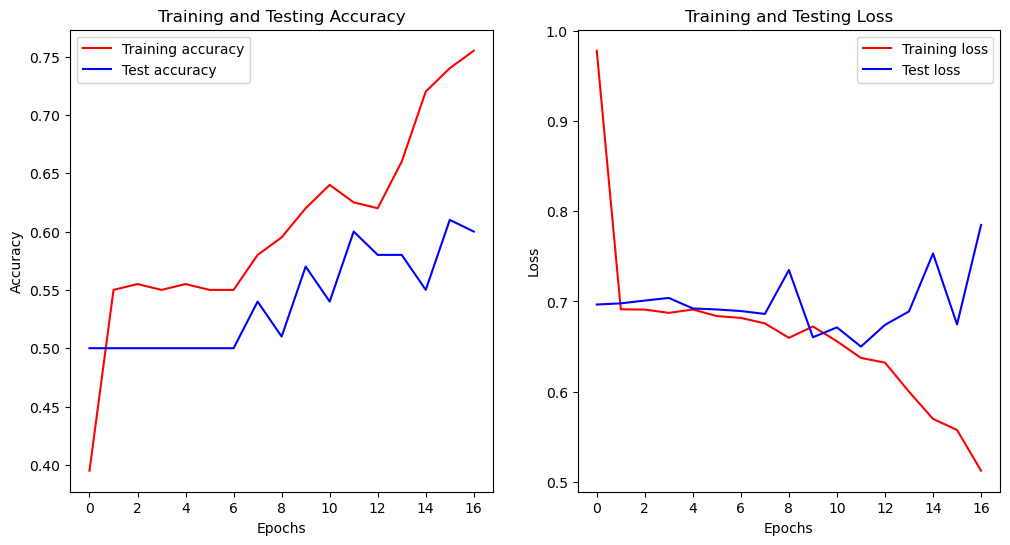

In [21]:
# Setting the figure size

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Test accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & Test loss

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Testing Image Classification Using HOG feature extractors

In [27]:
# Importing Required Packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import os
from skimage.feature import hog
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc

In [23]:
# Define Trainig data 

Train_feature=np.zeros(shape=(200,512))

path='Personal_Project/Image 1/'

train_label=[]

def label(filename):
    if 'car' in filename:
        return 0
    elif 'bus' in filename:
        return 1

# for loop to extract features 

for n,filename in tqdm(enumerate(os.listdir(path))):
    image = cv2.resize(cv2.imread(os.path.join(path,filename)),(128,128))
    train_label.append(label(filename))
    Train_feature[n,:] = hog(image, orientations = 8, pixels_per_cell = (16, 16), cells_per_block = (1, 1), 
                                visualize = False, channel_axis = -1,)

200it [00:01, 177.51it/s]


In [24]:
# Defining Test Data

Test_feature = np.zeros(shape = (100,512))

path='Personal_Project/Image 2/'

test_label=[]

# for loop to extract features 
for n,filename in tqdm(enumerate(os.listdir(path))):
    image=cv2.resize(cv2.imread(os.path.join(path,filename)),(128,128))
    test_label.append(label(filename))
    Test_feature[n,:]=hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), 
                          visualize=False, channel_axis=-1,)

100it [00:00, 188.61it/s]


In [26]:
# Define and Fit training data

model = LogisticRegression(random_state = 0).fit(Train_feature, train_label)
predictd = model.predict(Test_feature)

In [28]:
# Testing the model

print('Accuracy', acc(test_label , predictd))

Accuracy 0.85
